In [19]:
!pip install gensim


In [20]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [21]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [22]:

#find the most similar words to a word of your choice. 
model = gensim.downloader.load("glove-wiki-gigaword-100")

food = model['food']

print(model.most_similar('food'))

#Does the result make sense? Look up some of the words if you don't know them

#Yes, the result makes sense for the most part. The words are related to food or how food is referenced in common culture in some way. They either descibe food or are used to describe food in some way, except for medicine.

[('foods', 0.7469059824943542), ('supplies', 0.7264691591262817), ('products', 0.7225049138069153), ('meat', 0.7138239145278931), ('supply', 0.6732637882232666), ('feed', 0.670415461063385), ('medicines', 0.6687098145484924), ('meals', 0.6630423069000244), ('coffee', 0.6627735495567322), ('goods', 0.6610530614852905)]


In [23]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [24]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [25]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 

age = model["old"]-model["young"]
print(model.most_similar(age))
print(model.most_similar(-age))

model.most_similar(model["doctor"]+age)

#does this show any bias or assumptions in the data? 
#This shows a bit of bias, especially since the least similar words to the vector of 'old' are words like 'like-minded', 'impressionanable' and 'radicalizing'. While these depend on exact context to be a positive or negative, a bias is still present. In terms of association, there is a clear and significant bias with medical aliments.

[('95-year', 0.5542864799499512), ('300-year', 0.5494594573974609), ('900-year', 0.5219220519065857), ('200-year', 0.5151739716529846), ('70-year', 0.5059565305709839), ('400-year', 0.5055840611457825), ('92-year', 0.49865594506263733), ('99-year', 0.4962446093559265), ('73-year', 0.49302107095718384), ('75-year', 0.49246159195899963)]
[('delwyn', 0.47672921419143677), ('like-minded', 0.4626246988773346), ('3lw', 0.4440802037715912), ('impressionable', 0.44121474027633667), ('selvin', 0.43294182419776917), ('mambazo', 0.42512863874435425), ('radicalising', 0.4198727309703827), ('pre-teens', 0.4188278019428253), ('boobies', 0.4149583578109741), ('m.o.p.', 0.4132061302661896)]


[('doctor', 0.7340758442878723),
 ('old', 0.6422016024589539),
 ('hospital', 0.590244710445404),
 ('dentist', 0.576840877532959),
 ('condition', 0.5418602824211121),
 ('physician', 0.5347658395767212),
 ('nurse', 0.529510498046875),
 ('father', 0.5210617184638977),
 ('mother', 0.5204290747642517),
 ('grandmother', 0.5017393827438354)]

Part 2: Visualization and Embeddings in Space

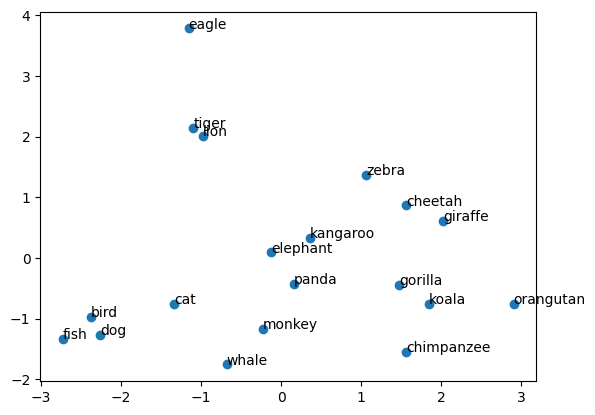

In [26]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

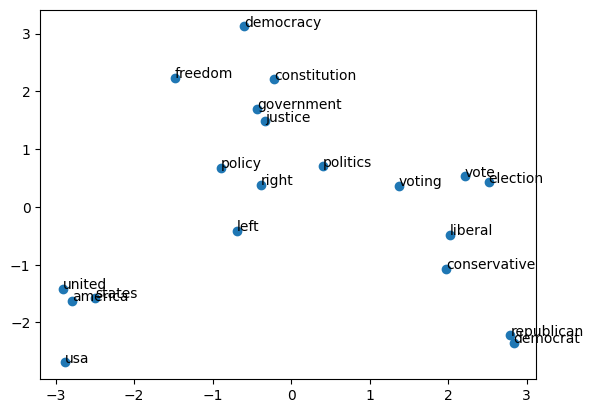

In [27]:
#repeat this process with your own set of 10-20 words. 

words=["america","usa","united", "democracy", "democrat", "republican", "states", "politics", "government", "freedom", "justice", "vote", "voting", "election", "policy", "left", "right", "liberal", "conservative", "constitution", ]
x=[model[word] for word in words]
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x)
plt.scatter(X_pca[:,0],X_pca[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))
plt.show()
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

#Yes, they do make sense. Having the words 'united', 'states' and 'america' in such proximity is a good example of this. 



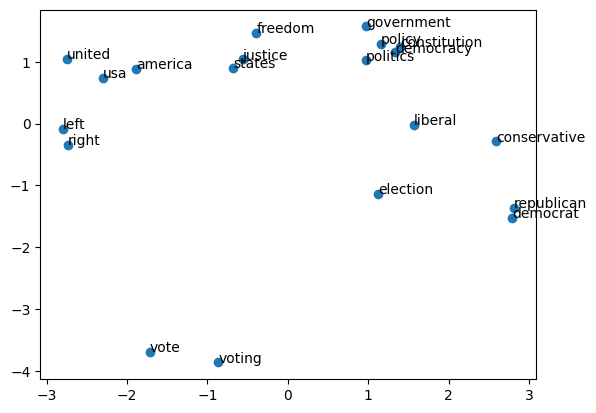

In [28]:
# repeat the process with a different pre-trained model and the same set of words. 
twitter_model= gensim.downloader.load("glove-twitter-100")
x=[twitter_model[word] for word in words]
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x)
plt.scatter(X_pca[:,0],X_pca[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))
plt.show()

# What has changed in the embedding space? What might this have to do with the training data?
#The words are a bit more spread out in the embedding space. Additionally, the word associations are a bit different, with the biggest cluster here being between 'government', 'policy', 'constitution', 'politics' and 'democracy'. While different, this cluster also makes complete sense. The same cluster as in the last model is also present.

Part 3: Embedding reddit posts

In [31]:
import pandas as pd
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer
import spacy

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])


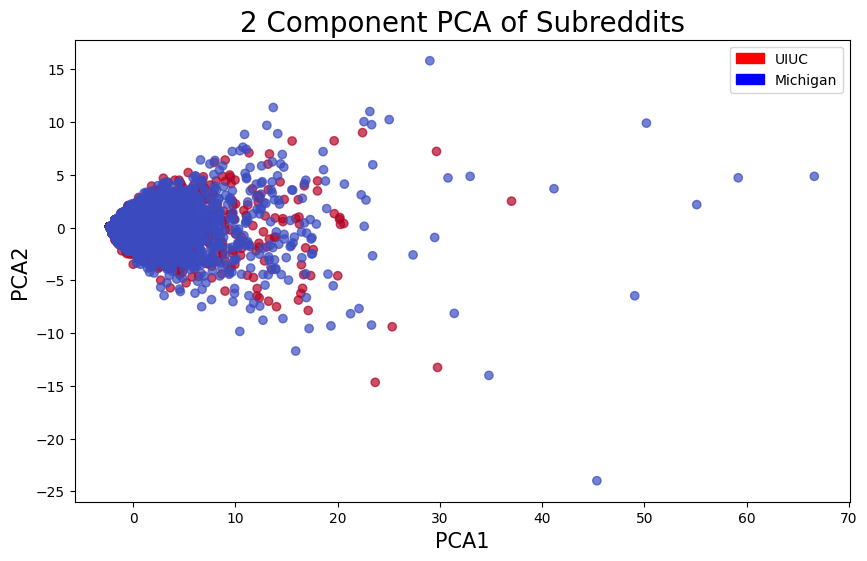

In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
#color by the "label" column to see if the two subreddits are separable in the embedding space

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data['cleaned_text'] = data['text'].apply(clean)

# Create a bag-of-words representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['cleaned_text']).toarray()

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_bow)

# Create a DataFrame for PCA results
principalDf = pd.DataFrame(data=principalComponents, columns=['PCA1', 'PCA2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(principalDf['PCA1'], principalDf['PCA2'], c=data['label'], cmap='coolwarm', alpha=0.7)

plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)
plt.title('2 Component PCA of Subreddits', fontsize=20)

# Add legend
import matplotlib.patches as mpatches
uiuc_patch = mpatches.Patch(color='red', label='UIUC')
mich_patch = mpatches.Patch(color='blue', label='Michigan')
plt.legend(handles=[uiuc_patch, mich_patch])

plt.show()



# is there a clear separation between the two columns? 
# Some separation is present, but it is not very clear. The two subreddits are not very separable in the embedding space.

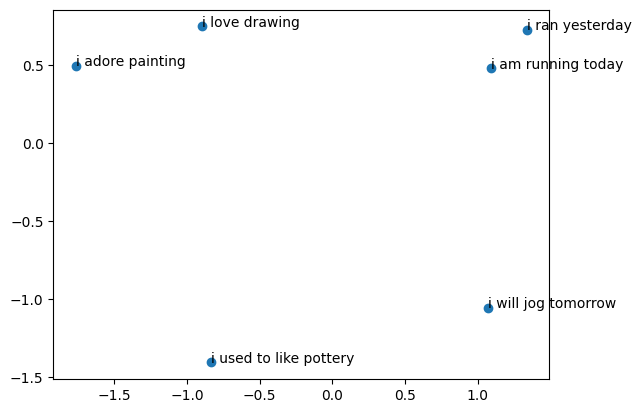

In [39]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

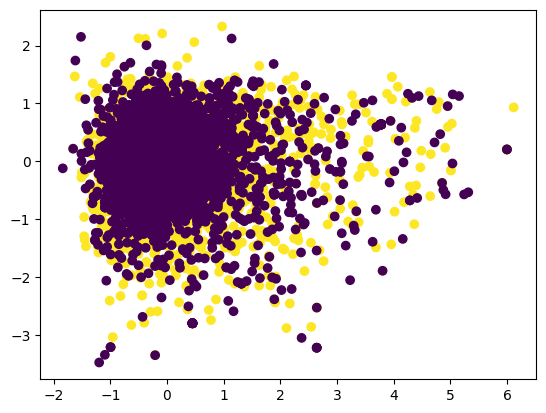

In [ ]:

#use this function to calculate the average embedding of each post in the dataset
import numpy as np

for i in sentences:
    new = [avg_embedding(i, model) for i in data['cleaned_text']]
#plot the pca of the average embeddings, color by the "label" column

pca=PCA(n_components=2)

X_pca=pca.fit_transform(new)

plt.scatter(X_pca[:,0],X_pca[:,1], c=data['label'])

plt.show()
#how is this plot different from the previous one? #is there clear separation? 
#The plot is different from the previous one in that the two subreddits are a bit more separable in the embedding space. The two subreddits are more distinct from each other in this plot, compared to the previous plot. There is a separation between the two subreddits, but it is not very clear.



Part 4: HuggingFace and BERT

In [56]:
!pip install transformers
!pip install transformers[torch]
!pip install torch

zsh:1: no matches found: transformers[torch]


In [57]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [87]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I want to go to the beach")

[{'label': 'POS', 'score': 0.9434951543807983}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
Neg = 0
Pos = 0
Neutral = 0

prp = []

for i in data['cleaned_text']:
    sentiment = pipe(i)
    label = sentiment[0]['label']
    if label == 'NEG':
        Neg += 1
    elif label == 'POS':
        Pos += 1
    elif label == 'NEU':
        Neutral += 1

print("Negative: ", Neg)
print("Positive: ", Pos)
print("Neutral: ", Neutral) 

#neutral is the most common sentiment label

Negative:  2135
Positive:  1754
Neutral:  5393


In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

for i in data['cleaned_text'][:10]:
    print(i)
    print(pipe(i))
    print("")


#I personally agree with the sentiment labels for the first 10 posts. They seem to be labeled correctly, although I'd assume most conversationalist comments would be neutral.

have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture
[{'label': 'NEU', 'score': 0.9368634819984436}]

do you find it helpful to still go to the lecture it seems to me that his slides are embedded with mistakes here and there it makes it more confusing for me to understand him
[{'label': 'NEG', 'score': 0.9619283676147461}]

have you tried emailing university housing to request access
[{'label': 'NEU', 'score': 0.9711514115333557}]

purchasing illini cash should get you added to the nonresident meal plan card access level these generally allow you access to whatever is considered the front door of the residence hall with access to the dining hall at par that would be the doors facing the bus stop on the south side of the building only the mag stripe

In [ ]:
# Is the UIUC or Michigan subreddit more negative?

IL = 0
MI = 0

for idx, i in enumerate(data['cleaned_text'][:800]):
    sentiment = pipe(i)
    label = sentiment[0]['label']
        
    if label == 'NEG':
        if data.iloc[idx]['label'] == 1:  
            IL += 1
        else:  
            MI += 1

print("UIUC Negative: ", IL)
print("Michigan Negative: ", MI)

UIUC Negative:  174
Michigan Negative:  0
